In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
class BigramWordGenerator:
    def __init__(self, file_path):
        # Read words from the .txt file, add special token '.'
        with open(file_path, 'r') as f:
            self.words = ['.' + word.strip().lower() + '.' for word in f.readlines()]
        self.bigram_probs = {}
        self.char_to_idx = {}
        self.idx_to_char = {}
        self._create_bigram_probs()
        
    def _create_bigram_probs(self):
        # Create a set of all characters
        characters = set(''.join(self.words))

        # Create character to index mappings, and vice versa
        for i, c in enumerate(sorted(characters)):
            self.char_to_idx[c] = i
            self.idx_to_char[i] = c

        # Count bigrams
        bigram_counts = np.zeros((len(self.char_to_idx), len(self.char_to_idx)))
        # add tiny value to avoid zero probabilities
        bigram_counts += 1e-10
        for word in self.words:
            for i in range(len(word) - 1):
                c1, c2 = word[i], word[i + 1]
                bigram_counts[self.char_to_idx[c1], self.char_to_idx[c2]] += 1

        # Normalize the counts to get probabilities
        self.bigram_probs = bigram_counts / bigram_counts.sum(axis=1, keepdims=True)

    def get_neg_log_likelihood(self, word):
        result = 0
        word = '.' + word.strip().lower() + '.'
        for i in range(len(word) - 1):
            c1, c2 = word[i], word[i + 1]
            result += np.log(self.bigram_probs[self.char_to_idx[c1], self.char_to_idx[c2]])
        return -round(result, 3)

    def generate_word(self, max_word_length):
        # Randomly choose the first character based on the bigram probabilities
        first_char_idx = np.random.multinomial(1, self.bigram_probs[0, :]).argmax()
        generated_word = [self.idx_to_char[first_char_idx]]

        # Generate the rest of the characters based on bigram probabilities
        for _ in range(max_word_length - 1):
            prev_char = generated_word[-1]
            next_char_idx = np.random.multinomial(1, self.bigram_probs[self.char_to_idx[prev_char], :]).argmax()
            next_char = self.idx_to_char[next_char_idx]

            # Check if the next character is the end character
            if next_char == '.':
                break
            else:
                generated_word.append(next_char)

        generated_word = ''.join(generated_word)
        return generated_word, self.get_neg_log_likelihood(generated_word)
    
    def display_probs(self):
        # Display the bigram probabilities as a heatmap, show probability in each cell
        plt.figure(figsize=(15, 15))
        plt.imshow(self.bigram_probs)
        plt.xticks(np.arange(len(self.char_to_idx)), sorted(self.char_to_idx.keys()))
        plt.yticks(np.arange(len(self.char_to_idx)), sorted(self.char_to_idx.keys()))
        plt.xlabel('Next Character')
        plt.ylabel('Previous Character')
        plt.title('Bigram Probabilities')
        plt.colorbar()
        for i in range(len(self.char_to_idx)):
            for j in range(len(self.char_to_idx)):
                plt.text(j, i, '{:.2f}'.format(self.bigram_probs[i, j]), ha='center', va='center', color='w')
        plt.show()

In [3]:
bigram_word_generator = BigramWordGenerator('data/names.txt')

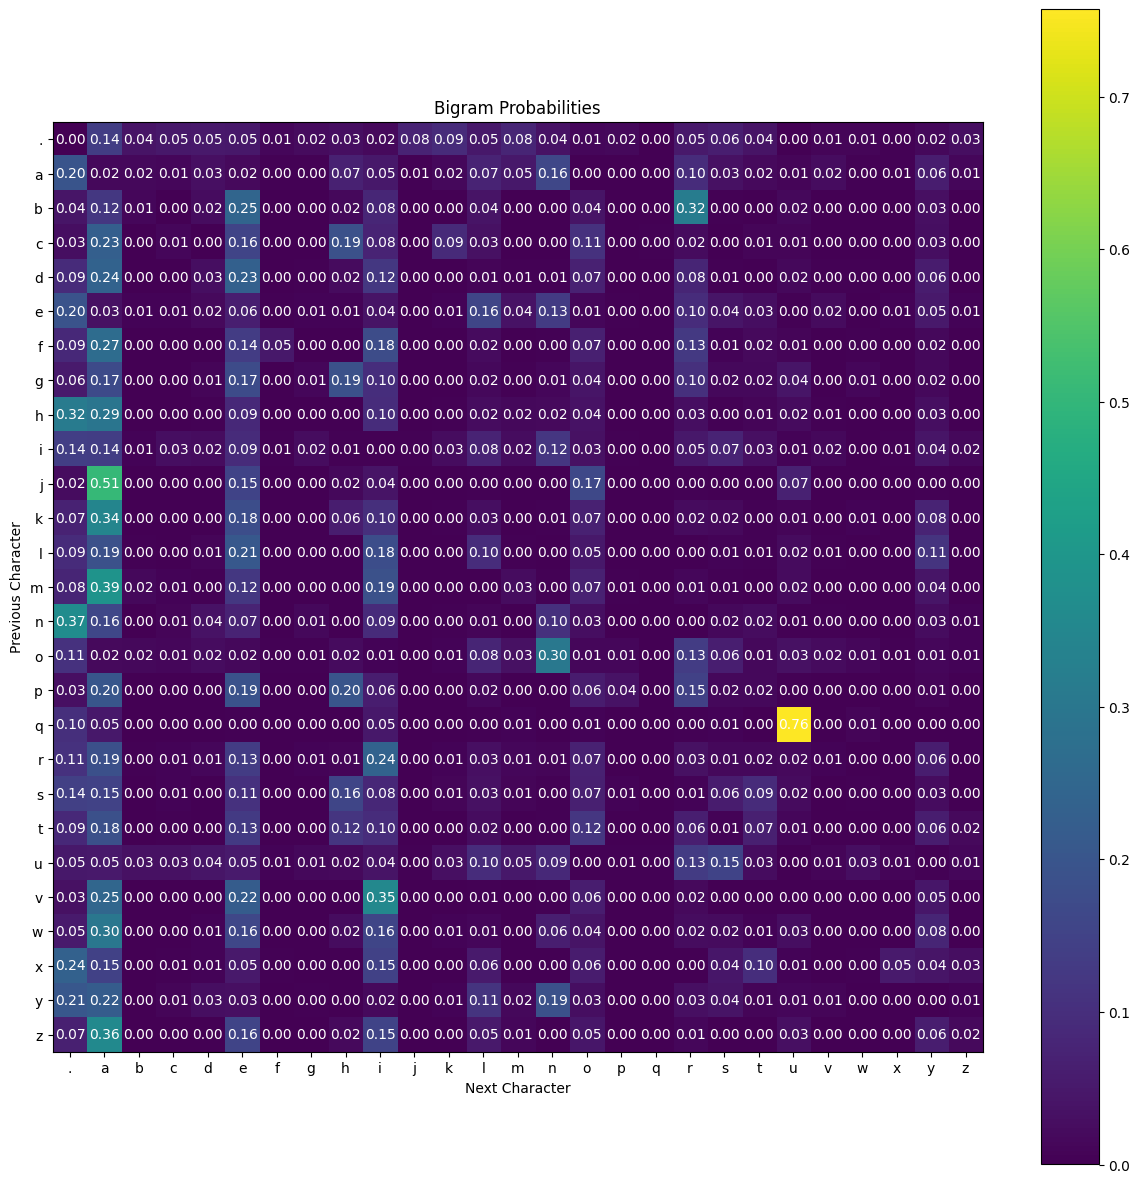

In [4]:
bigram_word_generator.display_probs()

In [5]:
max_word_length = 30
num_words = 40
generated_words = [bigram_word_generator.generate_word(max_word_length) for _ in range(num_words)]
df = pd.DataFrame(generated_words, columns=['word', 'neg_log_likelihood'])
df.sort_values(by='neg_log_likelihood', inplace=True)
df.reset_index(drop=True, inplace=True)
print(df)
print(f'Average negative log likelihood: {df.neg_log_likelihood.mean():.2f}')

                       word  neg_log_likelihood
0                         h               4.752
1                        an               4.809
2                         d               5.308
3                        ly               6.771
4                        bi               7.662
5                        sy               7.960
6                       lel               8.780
7                      alan               9.077
8                       vie               9.489
9                       wah               9.674
10                      sil              10.159
11                     lara              10.341
12                     avon              10.698
13                    kanah              10.924
14                     tane              10.955
15                     pare              11.709
16                      umi              12.658
17                      aiu              13.102
18                    aquan              14.380
19                    jeuse             